In [30]:
# Permet de tout executer au lancement du notebook + conserver le notebook actif pendant 2h
from IPython.display import Javascript
from masquer import *
Javascript("""
function repeter(){
IPython.notebook.kernel.execute("a=1");
}
// execute a = 1 en python toutes les 8 minutes pendant 2h
let timerId = setInterval(() => repeter(), 4800);
setTimeout(() => { clearInterval(timerId); alert('fin de cession'); }, 7200000);

// Supprimer la taille limite pour la sortie d'une cellule
IPython.OutputArea.prototype._should_scroll = function(lines) {
    return false;
};
IPython.notebook.kernel.execute("url = '" + window.location + "'");

// Exécuter toutes les cellule du notebook
    require(
        ['base/js/namespace', 'jquery'], 
        function(jupyter, $) {
            
                
                jupyter.actions.call('jupyter-notebook:run-all-cells-below');
                jupyter.actions.call('jupyter-notebook:save-notebook');
                Jupyter.actions.call('jupyter-notebook:hide-header')

        }
    );""")

<IPython.core.display.Javascript object>

In [31]:
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"
HTML("""<style>
h1 {
  font-family: 'Permanent Marker', cursive;
  text-align: center;
  color: red;
  
}
ol {
  list-style-position: inside;
  margin-left: 1em;
  list-style-position: outside;
}
h2 {
  font-family: 'Permanent Marker', cursive;
  color: blue;
}
h3 {
  font-family: 'Permanent Marker', cursive;

}
</style>""")

# CHAPITRE 3 - Les Tris

Trier des données est quelque chose de très utile en informatique, cela permet de faire fonctionner de manière efficace d'autres algorithmes. La meilleur complexité asymptotique en moyenne pour les algorithmes de tri est quasi linéaire O(n log n). Nous allons en étudier quelques uns et voir leur comportement. 

## I. Le tri insertion

Ce tri part d'une liste vide et insère des éléments à la bonne place en parcourant cette liste à chaque fois. Cette liste reste donc triée au cours du temps.

In [32]:
def tri_insert(L):
    rep = []
    for val in L:
        i = 0
        while i < len(rep):
            if val < rep[i]:
                break
            i = i+1
        rep.insert(i, val)
        print(rep) # Pour voir la liste triée se construire
    return rep

tri_insert([9,10,4,5])

[9]
[9, 10]
[4, 9, 10]
[4, 5, 9, 10]


[4, 5, 9, 10]

On peut également programmer ce tri **en place** c'est à dire en déplaçant des élément mais sans créer une nouvelle liste. Pour cela on utilisera un indice qui nous permettra de distinguer le début de la liste qui est triée et la fin qui contient les éléments non traités.

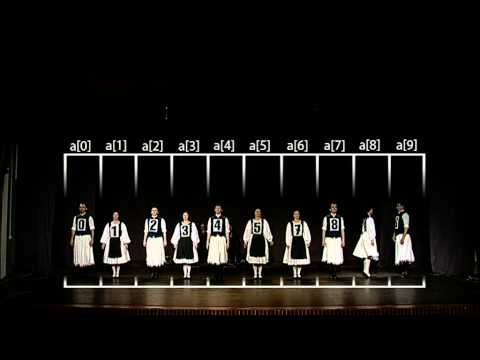

In [33]:
from IPython.display import YouTubeVideo
YouTubeVideo("ROalU379l3U",width="640px", height="315px")


In [34]:
def tri_insert(L):
    for i in range(len(L)):
        j = i
        while j > 0 and L[j-1] > L[j]:
            L[j-1], L[j] = L[j], L[j-1]
            j = j - 1
        print(L)
    return L

tri_insert([3, 0, 1, 8, 7, 2, 5, 4, 9, 6])

[3, 0, 1, 8, 7, 2, 5, 4, 9, 6]
[0, 3, 1, 8, 7, 2, 5, 4, 9, 6]
[0, 1, 3, 8, 7, 2, 5, 4, 9, 6]
[0, 1, 3, 8, 7, 2, 5, 4, 9, 6]
[0, 1, 3, 7, 8, 2, 5, 4, 9, 6]
[0, 1, 2, 3, 7, 8, 5, 4, 9, 6]
[0, 1, 2, 3, 5, 7, 8, 4, 9, 6]
[0, 1, 2, 3, 4, 5, 7, 8, 9, 6]
[0, 1, 2, 3, 4, 5, 7, 8, 9, 6]
[0, 1, 2, 3, 4, 5, 6, 7, 8, 9]


[0, 1, 2, 3, 4, 5, 6, 7, 8, 9]

On peut aussi utiliser la récursivité pour réaliser ce tri insertion. Par exemple:

In [35]:
def inserer(x,L): # L est une liste triée
    j = 0
    while j < len(L) and L[j] < x:
        j = j + 1
    L.insert(j,x)
    return L

def tri_insert2(L):
    if len(L) > 1:
        L = inserer(L[0], tri_insert2(L[1:]))
    return(L)
    
tri_insert2([3, 0, 1, 8, 7, 2, 5, 4, 9, 6])

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9]

Le tri par insertion a une complexité quadratique en moyenne et dans le pire cas. Il ne s'agit donc pas d'un tri efficace. Cependant, la variante en place permet d'utiliser moins de mémoire. 

Ce tri est également efficace sur des données presques triées car dans ce cas particulier la partie insertion se fait en temps constant et l'algorithme complet s'execute donc en temps linéaire.

On a la possiblité d'améliorer également ce tri en réalisant de la recherche dichotomique pour trouver l'emplacement de l'élément à insérer.

In [36]:
from random import randint
def melange(n,p):
    L = [i+1 for i in range(n)]
    for i in range(p):
        a = randint(0,n-1)
        b = randint(0,n-1)
        L[a], L[b] = L[b], L[a]
    return L

import matplotlib.pyplot as plt
from time import *

def trace(f, n, p):
    L = melange(n, p)
    listes = [L[:(i*n)//16] for i in range(1,17)]
    x = [(i*n)//16 for i in range(1,17)]
    y = []
    for i in range(16):
        temps = 0
        for j in range(5):
            l = listes[i][:]
            t = time()
            f(l)
            t = time() -t
            if t < temps or temps == 0:
                temps = t
        y.append(temps)
    plt.plot(x,y,"+")
    plt.show()
    
def chrono(f, n, p):
    L = melange(n, p)
    listes = [L[:(i*n)//16] for i in range(1,17)]
    x = [(i*n)//16 for i in range(1,17)]
    y = []
    for i in range(16):
        temps = 0
        for j in range(5):
            l = listes[i][:]
            t = time()
            f(l)
            temps += time() -t
        temps = temps / 5.
        y.append(temps)
    return x,y

In [37]:
def tri_insert3(L):
    for i in range(len(L)):
        j = i
        while j > 0 and L[j-1] > L[j]:
            L[j-1], L[j] = L[j], L[j-1]
            j = j - 1
    return L

In [38]:
x,y = chrono(tri_insert3,2000,2000)

Text(0.5, 1.0, 'Liste bien mélangée')

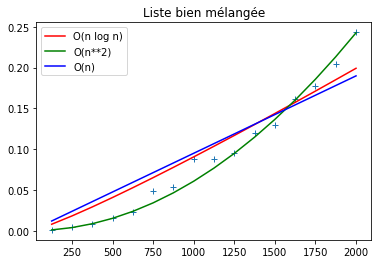

In [39]:
from scipy.optimize import curve_fit
from math import log2
import numpy as np

def f(x,a):
    return a*x*np.log(x)

def g(x,a):
    return a*x**2

def h(x,a):
    return a*x

params,cov = curve_fit(f,x,y)
params2,cov2 = curve_fit(g,x,y)
params3,cov3 = curve_fit(h,x,y)
y2 = [f(val,*params) for val in x]
y3 = [g(val,*params2) for val in x]
y4 = [h(val, *params3) for val in x]

plt.plot(x,y,"+")
plt.plot(x,y2,"r-",label="O(n log n)")
plt.plot(x,y3,"g-",label="O(n**2)")
plt.plot(x,y4,"b-", label="O(n)")
plt.legend()
plt.title("Liste bien mélangée")
plt.show()

Text(0.5, 1.0, 'Liste déjà triée')

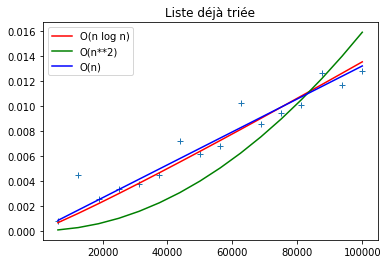

In [40]:
x,y = chrono(tri_insert3,100000,0)

params,cov = curve_fit(f,x,y)
params2,cov2 = curve_fit(g,x,y)
params3,cov3 = curve_fit(h,x,y)
y2 = [f(val,*params) for val in x]
y3 = [g(val,*params2) for val in x]
y4 = [h(val, *params3) for val in x]

plt.plot(x,y,"+")
plt.plot(x,y2,"r-",label="O(n log n)")
plt.plot(x,y3,"g-",label="O(n**2)")
plt.plot(x,y4,"b-", label="O(n)")
plt.legend()
plt.title("Liste déjà triée")
plt.show()

In [41]:
def melange2(n,p):
    L = [i+1 for i in range(n)]
    for i in range(p):
        a = randint(0,n-1)
        b = randint(-4,4) # on limite à un décalage de 4 places
        while a+b < 0 or a+b >= n:
            b = randint(-4,4)
        L[a], L[a+b] = L[a+b], L[a]
    return L

In [42]:
def chrono2(f, n, p):
    L = melange2(n, p)
    listes = [L[:(i*n)//16] for i in range(1,17)]
    x = [(i*n)//16 for i in range(1,17)]
    y = []
    for i in range(16):
        temps = 0
        for j in range(5):
            l = listes[i][:]
            t = time()
            f(l)
            temps += time() -t
        temps = temps / 5.
        y.append(temps)
    return x,y

Text(0.5, 1.0, 'Elements proches de leur position finale')

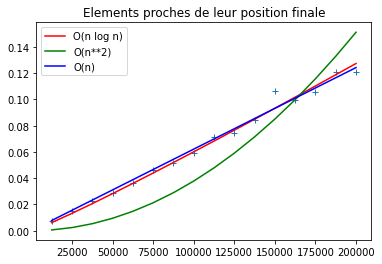

In [45]:
x,y = chrono2(tri_insert3,200000,200000) # 200000 éléments déplacés
# mais peu déplacés par rapport à leur position initiale

params,cov = curve_fit(f,x,y)
params2,cov2 = curve_fit(g,x,y)
params3,cov3 = curve_fit(h,x,y)
y2 = [f(val,*params) for val in x]
y3 = [g(val,*params2) for val in x]
y4 = [h(val, *params3) for val in x]

plt.plot(x,y,"+")
plt.plot(x,y2,"r-",label="O(n log n)")
plt.plot(x,y3,"g-",label="O(n**2)")
plt.plot(x,y4,"b-", label="O(n)")
plt.legend()
plt.title("Elements proches de leur position finale")
plt.show()